<a href="https://colab.research.google.com/github/faris-alsherif/Customer-Churn-Prediction/blob/main/Project_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Section1:Load and Clean data**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/faris-alsherif/Customer-Churn-Prediction/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df.shape

(7043, 21)

In [15]:
#to read all columns with the first five rows
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [18]:
#Check for duplicate rows
df.duplicated().sum()

np.int64(0)

In [19]:
#Show duplicate rows
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [20]:
#To delete the "customerID" columns
df.drop("customerID",axis=1,inplace=True)
df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [21]:
df.shape

(7043, 20)

In [44]:
#To make the letters of each column a lower letter
df.columns = df.columns.str.title()
df.head().T

,0,1,2,3,4
Gender,Female,Male,Male,Male,Female
Seniorcitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
Tenure,1,34,2,45,2
Phoneservice,No,Yes,Yes,No,Yes
Multiplelines,No phone service,No,No,No phone service,No
Internetservice,DSL,DSL,DSL,DSL,Fiber optic
Onlinesecurity,No,Yes,Yes,Yes,No
Onlinebackup,Yes,No,Yes,No,No


In [23]:
#printing the unique values in all  the columns
for column in df.columns:
    print(column,df[column].unique())
    print("*"*50)

Gender ['Female' 'Male']
**************************************************
Seniorcitizen [0 1]
**************************************************
Partner ['Yes' 'No']
**************************************************
Dependents ['No' 'Yes']
**************************************************
Tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
**************************************************
Phoneservice ['No' 'Yes']
**************************************************
Multiplelines ['No phone service' 'No' 'Yes']
**************************************************
Internetservice ['DSL' 'Fiber optic' 'No']
**************************************************
Onlinesecurity ['No' 'Yes' 'No internet service']
**************************************************
Onlinebackup ['Yes' 'No' 'No internet service']
*******

In [24]:
#to use describe function
df.describe()

,Seniorcitizen,Tenure,Monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Is the data balanced?

In [25]:
#How many customers churned
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


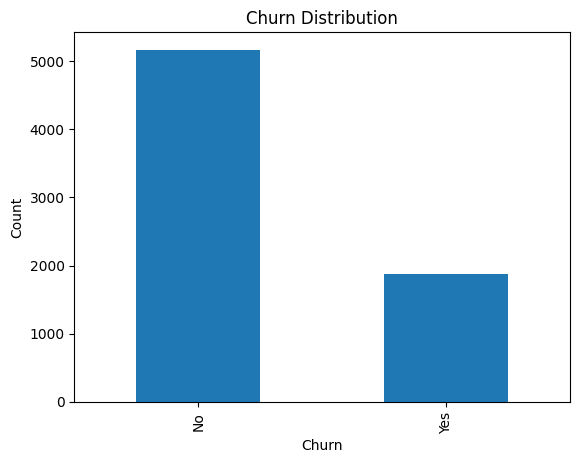

In [26]:
# Calculate the percentage for each value
print(df["Churn"].value_counts(normalize=True))


df["Churn"].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

# Handle missing values.

In [28]:
#### TotalCharges column ####

In [29]:
df.Totalcharges.describe()

,Totalcharges
count,7043
unique,6531
top,
freq,11


In [30]:
#To check for spaces in a TotalCharges column
df[df.Totalcharges.str.contains(" ")]

,Gender,Seniorcitizen,Partner,Dependents,Tenure,Phoneservice,Multiplelines,Internetservice,Onlinesecurity,Onlinebackup,Deviceprotection,Techsupport,Streamingtv,Streamingmovies,Contract,Paperlessbilling,Paymentmethod,Monthlycharges,Totalcharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [31]:
#To find out how many rows equal spaces in the Totalcharges column
len(df[df.Totalcharges.str.contains(" ")])

11

In [32]:
df[df["Totalcharges"]==" "].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
Seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Tenure,0,0,0,0,0,0,0,0,0,0,0
Phoneservice,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
Multiplelines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
Internetservice,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
Onlinesecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
Onlinebackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


In [33]:
df["Totalcharges"].dtype

dtype('O')

In [34]:
df["Totalcharges"].describe()

,Totalcharges
count,7043
unique,6531
top,
freq,11


In [35]:
#To convert the data type of the Totalcharges column from object to Float
df["Totalcharges"]= pd.to_numeric(df.Totalcharges,errors="coerce") #errors="coerce" -->makes any non-convertible value NaN

In [36]:
#To check if spaces  ​​convert to NaN
df.iloc[[488,753,936,1082,1340,3331,3826,4380,5218,6670,6754],:].T

,488,753,936,1082,1340,3331,3826,4380,5218,6670,6754
Gender,Female,Male,Female,Male,Female,Male,Male,Female,Male,Female,Male
Seniorcitizen,0,0,0,0,0,0,0,0,0,0,0
Partner,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
Dependents,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
Tenure,0,0,0,0,0,0,0,0,0,0,0
Phoneservice,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes
Multiplelines,No phone service,No,No,Yes,No phone service,No,Yes,No,No,Yes,Yes
Internetservice,DSL,No,DSL,No,DSL,No,No,No,No,DSL,DSL
Onlinesecurity,Yes,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,No,Yes
Onlinebackup,No,No internet service,Yes,No internet service,Yes,No internet service,No internet service,No internet service,No internet service,Yes,Yes


<Axes: >

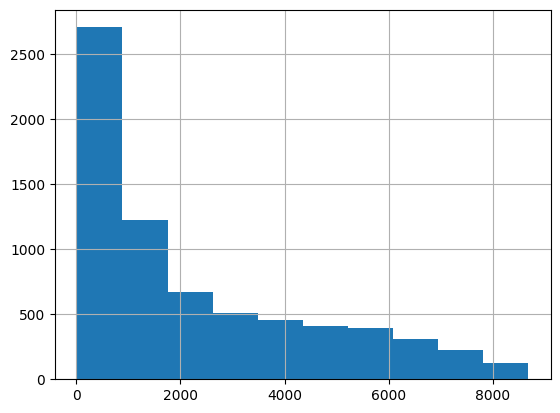

In [37]:
df["Totalcharges"].hist()

In [38]:
#Totalcharges Column relationship with other columns
df[["Totalcharges","Monthlycharges","Tenure"]].corr()

,Totalcharges,Monthlycharges,Tenure
Totalcharges,1.000000,0.651065,0.82588
Monthlycharges,0.651065,1.000000,0.24790
Tenure,0.825880,0.247900,1.00000


In [39]:
#To delete rows that contain null values ​​from a Totalcharges column
df.dropna(subset=["Totalcharges"],inplace=True)

In [40]:
df["Totalcharges"].isnull().sum()

np.int64(0)

In [41]:
df["Totalcharges"].describe()

,Totalcharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


In [42]:
df.isnull().sum()

,0
Gender,0
Seniorcitizen,0
Partner,0
Dependents,0
Tenure,0
Phoneservice,0
Multiplelines,0
Internetservice,0
Onlinesecurity,0
Onlinebackup,0


## **Section2: Exploratory Data Analysis**